Il s’agit d’un jeu de données classiques qui permet de comparer les algorithmes de classification
sur des données en deux dimensions imbriquées.

# 1. Visualisation des données

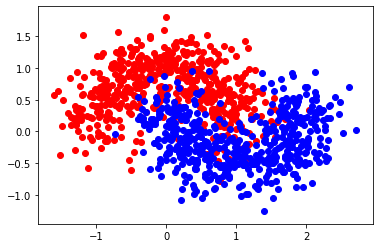

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
#help(make_moons)
data1=make_moons(n_samples=1000,noise=0.3,random_state=0)
X1=data1[0]
y1=data1[1]
plt.scatter(X1[y1==0][:,0],X1[y1==0][:,1],color='red')
plt.scatter(X1[y1==1][:,0],X1[y1==1][:,1],color='blue')
plt.show()

In [3]:
def validateur_malprediction(lis_1, lis_2):
    """ validateur_malprediction : Retourne le pourcentage d’étiquettes mal prédites
    """
    size = len(lis_1)
    if size != len(lis_2):
        logging.error("Liste de taille differente")
        return 0
    # 1) trouver le total d’étiquettes mal prédites
    _sum = 0
    for i in range(size):
        if lis_1[i] != lis_2[i]:
            _sum += 1
    # 2) retourner le facteur en %
    return _sum*100 / float(size)

###############################################################

def predic_cross_valid(algo, x, y):
    """train : cross validation pour l'algorithme de sklearn
        x = data
        y = target
    """
    # taille de jeu de donnees
    taille = len(x)

    predicted_target = np.zeros(taille, dtype=np.int)

    for i in range(taille):
        # leave one out
        valid = x[i]
        train = np.delete(x, i, 0)
        train_target = np.delete(y, i, 0)
        
        # trouver la classe
        algo.fit(train, train_target)
        predicted_target[i] = algo.predict(valid.reshape(1, -1))

    return {'target': predicted_target, 'error': validateur_malprediction(predicted_target, y)}


# 2. Classification

Le jeu de données est suffisamment volumineux pour pouvoir le répartir en un ensemble
d’apprentissage, contenant environ 70% des données, et un ensemble test, contenant les 30%
restant. Vous allez tester et comparer :
+ l’algorithme des k-plus proches voisins, avec k = 3,
+ l’apprentissage par arbre de décision, utilisant le critère de Gini,
+ un SVM polynomial de degré 3,
+ un SVM avec noyau RBF.

Dans un premier temps, les classifieurs seront utilisés avec leur paramétrage par défaut.
Remplissez le tableau suivant, en indiquant le pourcentage d’erreur de chaque classifieur sur l’échantillon d’apprentissage et sur l’échantillon test. Vous pourrez utiliser la fonction
clf.score(X test,y test) pour obtenir le score du classifieur clf sur l’échantillon test.

**- l’algorithme des k-plus proches voisins, avec k = 3,**


In [11]:
from sklearn import neighbors
import numpy as np

target_sklearn = neighbors.KNeighborsClassifier(n_neighbors=3)

sklearn_ppv_target = predic_cross_valid(target_sklearn, X1, y1)

#print("KNeighbors : %s"% sklearn_ppv_target['target'])
print("KNeighbors pourcentage d’étiquettes mal prédites : %.1f"% sklearn_ppv_target['error'])

KNeighbors pourcentage d’étiquettes mal prédites : 10.0


**- l’apprentissage par arbre de décision, utilisant le critère de Gini,**

In [12]:
from sklearn import tree
classifieur = tree.DecisionTreeClassifier()

sklearn_ad_target = predic_cross_valid(classifieur, X1, y1)
    
#print("DecisionTree : %s"% sklearn_ad_target['target'])
print("DecisionTree pourcentage d’étiquettes mal prédites : %.1f"% sklearn_ad_target['error'])

DecisionTree pourcentage d’étiquettes mal prédites : 12.9


**-un SVM polynomial de degré 3,**

In [19]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', degree=3, gamma='scale')

sklearn_svc_poly3_target = predic_cross_valid(clf, X1, y1)
#print("DecisionTree : %s"% sklearn_ad_target['target'])
print("SVM pourcentage d’étiquettes mal prédites : %.1f"% sklearn_svc_poly3_target['error'])

SVM pourcentage d’étiquettes mal prédites : 12.8


**-un SVM avec noyau RBF.**

In [18]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf',gamma=0.05)

sklearn_svc_rbf_target = predic_cross_valid(clf, X1, y1)
#print("DecisionTree : %s"% sklearn_ad_target['target'])
print("SVM rbf pourcentage d’étiquettes mal prédites : %.1f"% sklearn_svc_rbf_target['error'])

SVM rbf pourcentage d’étiquettes mal prédites : 15.5


# 3. Sélection des hyperparamètres

Utilisez une validation croisée pour sélectionner les meilleurs hyperparamètres pour chaque
méthode. On se limitera à
+ k pour les plus proches voisins (entre 1 et 10).
+ max_depth pour les arbres de décision (entre 1 et 10).
+ le degré du polynôme pour le SVM polynomial (entre 1 et 10).
+ la valeur de gamma pour le SVM RBF (entre 0 et 10).

Remplissez le tableau suivant (pour les mêmes ensembles d'apprentissage et de test qu'à la
question précédente) avec les hyperparamètres que vous avez sélectionnés.

degree  | naifACP20 | naifACP40 | naifACP60 | histACP20|histACP40 | histACP60|completACP20|completACP40|completACP60
---|---|---|---|---|---|---|---|---|---
 **2** | 0.6542 | 0.8142 | 0.8142| 0.8128 | 0.8928 | 0.8928 |0.6542|0.8142 |0.8142
 **3** | 0.8714 | 0.8714 | 0.8714| 0.8361 | 0.8928 | 0.8928 |0.8714|0.8714 |0.8714
 **4** | 0.7914 | 0.7914 | 0.7914| 0.7961 | 0.8928 | 0.8928 |0.7914|0.7914 |0.7914
 **5** | 0.7914 | 0.7914 | 0.7914| 0.8533 | 0.7961 | 0.7961 |0.7914|0.7914 |0.7914

# 4. Exemples mal classés

Pour chacun des classifieurs précédents, indiquez sur un dessin où se trouvent les exemples mal
classés. Vous pourrez utiliser les commandes

In [15]:
Z=clf.predict(X_test)
X_false=X_test[Z != y_test]
plt.scatter(X_test[y_test==0][:,0],X_test[y_test==0][:,1],color='red')
plt.scatter(X_test[y_test==1][:,0],X_test[y_test==1][:,1],color='blue')
plt.scatter(X_false[:,0],X_false[:,1],color='black')
plt.show()

NameError: name 'clf' is not defined